In [1]:
import requests
from bs4 import BeautifulSoup
import time 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Testing of request

In [2]:
Base_URL = 'https://www.bayt.com/en/egypt/jobs/machine-learning-jobs/'
page = requests.get(Base_URL,headers = {'User-Agent':'Mozilla/5.0'})
soup = BeautifulSoup(page.content, 'html.parser')
print(page)

<Response [200]>


In [3]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta charset="utf-8" content=""/>
<meta content="width=device-width, initial-scale=1.0,user-scalable=0" name="viewport"/>
<meta content="Copyright 2000-2022 Bayt.com, Inc." name="copyright"/>
<meta content="116830345011417" data-js-id="meta-fb_app_id" property="fb:app_id"/>
<meta content="Bayt.com" data-js-id="meta-og_site_name" property="og:site_name"/>
<meta content="Machine Learning Jobs in Egypt (September 2022) - Bayt.com" data-js-id="meta-og_title" property="og:title"/>
<meta content="https://img0cf.b8cdn.com/images/logos/fb_bayt_new_en.png" data-js-id="meta-og_image_secure_url" property="og:image:secure_url"/>
<meta content="http://img0cf.b8cdn.com/images/logos/fb_bayt_new_en.png" data-js-id="meta-og_image" property="og:image"/>
<meta content="Apply now to over 90 Machine Learning jobs in Egypt and make your job hunting simpler. Find the latest Machine Learning job vacancies and employment opportun

In [4]:
def loader(items):
    its = []
    for item in items : 
        its.append(item.text.strip())
    return its

def link_loader(Base_URL,items):
    its = []
    for item in items : 
        its.append(Base_URL+item.a['href'])
    return its

def describtion_loader(item):
    item.find_all('p')[0].text.replace('\n',' ')
    

In [5]:
# 'https://www.bayt.com'
Machine_Learning_jobs = []
Job_links = []
Companies_Name = []
Describtions = []
Date = []
for page_num in range(1,6):
    Base_URL = f'https://www.bayt.com/en/egypt/jobs/machine-learning-jobs/?page={page_num}'
    page = requests.get(Base_URL,headers = {'User-Agent':'Mozilla/5.0'})
    soup = BeautifulSoup(page.content, 'html.parser')
#     soup.find_all('h2',"jb-title")[0].text.strip()
    
    Machine_Learning_jobs.append(loader(soup.find_all('h2',"jb-title")))
    
    Companies_Name.append(loader(soup.find_all('b',"jb-company")))
    
    Date.append(loader(soup.find_all('div',"jb-date")))
    
    Job_links.append(link_loader('https://www.bayt.com',soup.find_all('h2',"jb-title")))
    
    time.sleep(5)
    
    
#     Describtions.append(loader(soup.find_all('div',"jb-descr")))
    
#     print(Describtions)
# print()    
# print(Machine_Learning_jobs)
# print()
# print(Companies_Name)
# print()
# print(Job_links)
# print()

# Make list in one dimantion or flat

In [6]:
def flat(lis):
    flatList = []
    # Iterate with outer list
    for element in lis:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

In [7]:
len(Machine_Learning_jobs)

5

In [8]:
Machine_Learning_jobs = flat(Machine_Learning_jobs)
Machine_Learning_jobs_data = pd.DataFrame({'Machine_Learning_Job':Machine_Learning_jobs})
Machine_Learning_jobs_data

,Machine_Learning_Job
0,Solution Architect
1,Machine Learning Engineer
2,AI/Machine Learning Engineering Lead
3,"Senior Software Developer, Machine Learning"
4,AI/ML (Artificial Intelligence/Machine Learnin...
...,...
93,Professor / Associate Professor / Lecturer of ...
94,Technical Performance Specialist - Cyber Security
95,DevSecOps Eng
96,Product Analyst


In [9]:
Companies = flat(Companies_Name)


In [10]:
Machine_Learning_jobs = flat(Machine_Learning_jobs)
Machine_Learning_jobs_data = pd.DataFrame({'Machine_Learning_Job':Machine_Learning_jobs})
Machine_Learning_jobs_data

,Machine_Learning_Job
0,Solution Architect
1,Machine Learning Engineer
2,AI/Machine Learning Engineering Lead
3,"Senior Software Developer, Machine Learning"
4,AI/ML (Artificial Intelligence/Machine Learnin...
...,...
93,Professor / Associate Professor / Lecturer of ...
94,Technical Performance Specialist - Cyber Security
95,DevSecOps Eng
96,Product Analyst


In [19]:
Date_data = flat(Date)
Data_data = pd.DataFrame({'Date':Date_data})
# Date_data

In [12]:
Job_links = flat(Job_links)

In [13]:
Describtions = []
for decribtion_link in Job_links : 
    page = requests.get(decribtion_link , headers = {'User-Agent':'Mozilla/5.0'})
    soup = BeautifulSoup(page.content,'html.parser')
    Describtions.append(soup.find('div','card-content is-spaced').find_all('p')[0].text.replace('\n',' '))
# Describtions   

In [14]:
Describtion = pd.DataFrame({'Describtion':Describtions})
Describtion

,Describtion
0,We are looking for an innovative solution arch...
1,Unifonic is a customer engagement platform tha...
2,Unifonic is a customer engagement platform tha...
3,"Position:Senior Software Developer, Machine Le..."
4,Position:AI/ML (Artificial Intelligence/Machin...
...,...
93,The German University in Cairo invites applica...
94,"Udacity is on a mission to change lives, busin..."
95,To help us build secure and functional systems...
96,Unifonic is a customer engagement platform tha...


In [15]:
result = pd.DataFrame({'Machine_Learning_jobs':Machine_Learning_jobs,'Company':Companies, 'Job_links':Job_links, 'Date':Date_data, 'Describtion':Describtions})


In [16]:
result

,Machine_Learning_jobs,Company,Job_links,Date,Describtion
0,Solution Architect,GIZA Systems,https://www.bayt.com/en/egypt/jobs/solution-ar...,25 days ago,We are looking for an innovative solution arch...
1,Machine Learning Engineer,UNIFONIC,https://www.bayt.com/en/egypt/jobs/machine-lea...,29 days ago,Unifonic is a customer engagement platform tha...
2,AI/Machine Learning Engineering Lead,UNIFONIC,https://www.bayt.com/en/egypt/jobs/ai-machine-...,27 days ago,Unifonic is a customer engagement platform tha...
3,"Senior Software Developer, Machine Learning","Arrow Electronics, Inc",https://www.bayt.com/en/egypt/jobs/senior-soft...,30+ days ago,"Position:Senior Software Developer, Machine Le..."
4,AI/ML (Artificial Intelligence/Machine Learnin...,"Arrow Electronics, Inc",https://www.bayt.com/en/egypt/jobs/ai-ml-artif...,30+ days ago,Position:AI/ML (Artificial Intelligence/Machin...
...,...,...,...,...,...
93,Professor / Associate Professor / Lecturer of ...,GUC,https://www.bayt.com/en/egypt/jobs/professor-a...,30+ days ago,The German University in Cairo invites applica...
94,Technical Performance Specialist - Cyber Security,udacity,https://www.bayt.com/en/egypt/jobs/technical-p...,30+ days ago,"Udacity is on a mission to change lives, busin..."
95,DevSecOps Eng,Rabbit Mart BV,https://www.bayt.com/en/egypt/jobs/devsecops-e...,30+ days ago,To help us build secure and functional systems...
96,Product Analyst,UNIFONIC,https://www.bayt.com/en/egypt/jobs/product-ana...,30+ days ago,Unifonic is a customer engagement platform tha...


In [17]:
result.to_csv('Desktop\data.csv')

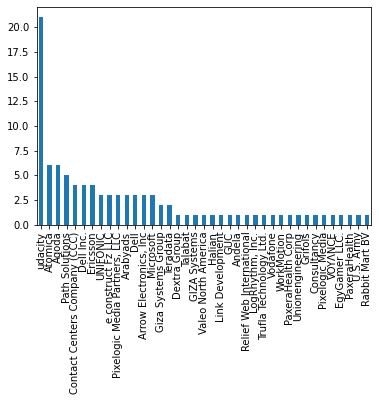

In [18]:
fig = result['Company'].value_counts().plot.bar()